In [79]:
# import pip
# pip.main(["install","factor_analyzer"])

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer #This is for Factor Analysis
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity #For testing the factorability
from factor_analyzer.factor_analyzer import calculate_kmo #For testing the factorability

In [81]:
data=pd.read_csv("D:\\Workshops\\Python for Data Science Comprehensive Workshop\\Part 04 - Machine Learning\\Datasets\\bfi.CSV")
data.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [82]:
data.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5'],
      dtype='object')

In [83]:
data.shape

(2800, 25)

In [84]:
data.isnull().sum()

A1    16
A2    27
A3    26
A4    19
A5    16
C1    21
C2    24
C3    20
C4    26
C5    16
E1    23
E2    16
E3    25
E4     9
E5    21
N1    22
N2    21
N3    11
N4    36
N5    29
O1    22
O2     0
O3    28
O4    14
O5    20
dtype: int64

In [85]:
data.dropna(inplace=True) #Remove missing value rows

In [86]:
data.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


# Testing the factorability

# Bartlett’s Test

In [87]:
chi_square_value,p_value=calculate_bartlett_sphericity(data)
chi_square_value, p_value    #P-Value is less than 0.05

(18170.966350869257, 0.0)

# Kaiser-Meyer-Olkin (KMO) Test

In [88]:
kmo_all,kmo_model=calculate_kmo(data)
kmo_model   #Above 0.6 means better

0.8485397221949222

# Creating the factor analyzer object

In [89]:
fa = FactorAnalyzer(n_factors=25,rotation=None)

# Selecting all the factors without rotations

In [90]:
fa.fit(data)

FactorAnalyzer(n_factors=25, rotation=None, rotation_kwargs={})

# Eigen values and normalized eigen vectors

In [91]:
ev, v = fa.get_eigenvalues()

In [92]:
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

# Scree plot

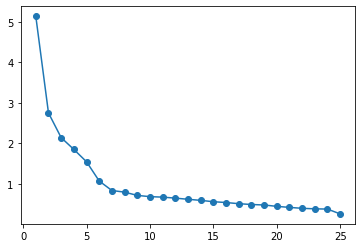

In [93]:
plt.plot(range(1,data.shape[1]+1),ev)
plt.scatter(range(1,data.shape[1]+1),ev)
plt.show()

# Selecting suitable number of factors and refit

In [94]:
fa = FactorAnalyzer(n_factors=6,rotation=None)
fa.fit(data)

FactorAnalyzer(n_factors=6, rotation=None, rotation_kwargs={})

# Factor loadings

In [96]:
fa.loadings_

array([[-0.2299591 , -0.0199644 ,  0.13664662,  0.00040695, -0.42097323,
         0.29095465],
       [ 0.47112236,  0.29000259, -0.18170633,  0.13569486,  0.35813008,
        -0.17296976],
       [ 0.5311117 ,  0.29897211, -0.2473526 ,  0.11164313,  0.28511745,
         0.00377123],
       [ 0.41593357,  0.11326978, -0.11828589,  0.266842  ,  0.15956224,
         0.02423477],
       [ 0.58069342,  0.1803745 , -0.26148603,  0.04682619,  0.16599243,
         0.12301928],
       [ 0.34352424,  0.13222201,  0.44436455,  0.11178854, -0.0172165 ,
         0.11418533],
       [ 0.33863513,  0.19670947,  0.48597759,  0.27436414,  0.02325613,
         0.1733831 ],
       [ 0.31809501,  0.05288982,  0.34606731,  0.30142196,  0.02690368,
         0.03926164],
       [-0.47669319,  0.11094474, -0.48106894, -0.22335436,  0.02305138,
         0.2645765 ],
       [-0.49131858,  0.15020093, -0.28415013, -0.2691626 ,  0.10682991,
         0.05953788],
       [-0.41148912, -0.18456327,  0.27002946,  0.

# SS Loadings, Proportion Var and Cumulative Var of factors

In [97]:
fa.get_factor_variance()

(array([4.6215181 , 2.28722515, 1.58418967, 1.24487296, 0.99295567,
        0.5205644 ]),
 array([0.18486072, 0.09148901, 0.06336759, 0.04979492, 0.03971823,
        0.02082258]),
 array([0.18486072, 0.27634973, 0.33971732, 0.38951224, 0.42923046,
        0.45005304]))

# Communalities

In [98]:
fa.get_communalities()

array([0.3338253 , 0.51566376, 0.52641764, 0.29707441, 0.48299468,
       0.35878279, 0.49542081, 0.31686483, 0.59139172, 0.43210146,
       0.39874554, 0.55999664, 0.48248334, 0.56004368, 0.40138104,
       0.70203777, 0.66528024, 0.5379306 , 0.50555798, 0.3491531 ,
       0.34667054, 0.29854404, 0.4860021 , 0.24612269, 0.36083927])

# With factor rotation

In [99]:
fa = FactorAnalyzer(n_factors=6,rotation="varimax")
fa.fit(data)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [101]:
np.set_printoptions(suppress=True) #This will remove the scientific notation

In [102]:
fa.loadings_

array([[ 0.09521974,  0.04078316,  0.04873389, -0.53098735, -0.11305733,
         0.16121635],
       [ 0.03313128,  0.23553804,  0.13371439,  0.66114098,  0.06373379,
        -0.00624354],
       [-0.00962088,  0.34300817,  0.12135337,  0.60593269,  0.03399026,
         0.16010643],
       [-0.08151756,  0.21971672,  0.23513953,  0.40459404, -0.12533802,
         0.0863557 ],
       [-0.14961589,  0.41445768,  0.10638217,  0.46969829,  0.03097657,
         0.23651934],
       [-0.0043584 ,  0.07724775,  0.55458226,  0.0075107 ,  0.19012373,
         0.09503505],
       [ 0.06833008,  0.03837038,  0.67454545,  0.05705499,  0.08759259,
         0.15277508],
       [-0.03999367,  0.0318673 ,  0.55116444,  0.10128224, -0.01133809,
         0.00899628],
       [ 0.21628337, -0.06624077, -0.63847549, -0.10261694, -0.14384648,
         0.3183589 ],
       [ 0.28418724, -0.1808117 , -0.54483768, -0.05995482,  0.02583709,
         0.13242345],
       [ 0.02227979, -0.59045089,  0.05391491, -0.

In [103]:
ind=data.columns
df=pd.DataFrame(fa.loadings_,columns=range(1,7),index=ind)
df

,1,2,3,4,5,6
A1,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
A2,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
A3,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
A4,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
A5,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519
C1,-0.004358,0.077248,0.554582,0.007511,0.190124,0.095035
C2,0.068330,0.038370,0.674545,0.057055,0.087593,0.152775
C3,-0.039994,0.031867,0.551164,0.101282,-0.011338,0.008996
C4,0.216283,-0.066241,-0.638475,-0.102617,-0.143846,0.318359
C5,0.284187,-0.180812,-0.544838,-0.059955,0.025837,0.132423


In [104]:
fa.get_factor_variance()

(array([2.7269887 , 2.60223901, 2.07347064, 1.7134991 , 1.50483136,
        0.63029714]),
 array([0.10907955, 0.10408956, 0.08293883, 0.06853996, 0.06019325,
        0.02521189]),
 array([0.10907955, 0.21316911, 0.29610793, 0.3646479 , 0.42484115,
        0.45005304]))

In [105]:
fa.get_communalities()

array([0.3338253 , 0.51566376, 0.52641764, 0.29707441, 0.48299468,
       0.35878279, 0.49542081, 0.31686483, 0.59139172, 0.43210146,
       0.39874554, 0.55999664, 0.48248334, 0.56004368, 0.40138104,
       0.70203777, 0.66528024, 0.5379306 , 0.50555798, 0.3491531 ,
       0.34667054, 0.29854404, 0.4860021 , 0.24612269, 0.36083927])

# Select more suitable factors

In [110]:
fa = FactorAnalyzer(n_factors=5,rotation="varimax")
fa.fit(data)

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

In [111]:
x_latent=fa.fit_transform(data)
x_latent

array([[-0.43983041,  0.10389656, -1.21671279, -0.69621532, -1.51944901],
       [ 0.08436922,  0.55931085, -0.60152093, -0.18934142, -0.24838425],
       [ 0.5205342 ,  0.3182346 ,  0.02564572, -0.75113555,  0.20450298],
       ...,
       [-0.22326681,  0.72116924,  0.78710982, -1.05847977,  0.92510304],
       [ 0.9205205 ,  0.7493374 ,  0.07095309, -2.13514505,  0.67346016],
       [-1.68998315, -1.35240274, -0.0814335 , -1.85488923, -0.16387988]])

In [112]:
ind=data.columns
df=pd.DataFrame(fa.loadings_,columns=range(1,6),index=ind)
df

,1,2,3,4,5
A1,0.111126,0.040465,0.022798,-0.428166,-0.077931
A2,0.029588,0.213716,0.139037,0.626946,0.062139
A3,0.009357,0.317848,0.109331,0.650743,0.056196
A4,-0.066476,0.204566,0.230584,0.435624,-0.112700
A5,-0.122113,0.393034,0.087869,0.537087,0.066708
C1,0.010416,0.070184,0.545824,0.038878,0.209584
C2,0.089574,0.033270,0.648731,0.102782,0.115434
C3,-0.030855,0.023907,0.557036,0.111578,-0.005183
C4,0.240410,-0.064984,-0.633806,-0.037498,-0.107535
C5,0.290318,-0.176395,-0.562467,-0.047525,0.036822
